In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv(r'sample_files/Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<AxesSubplot:xlabel='total_spend', ylabel='sales'>

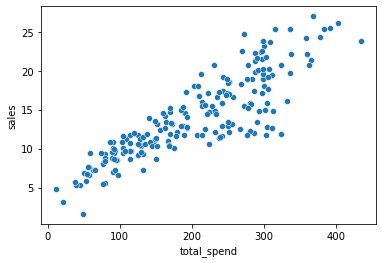

In [6]:
#visualize
sns.scatterplot(data=df, x='total_spend', y='sales')

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

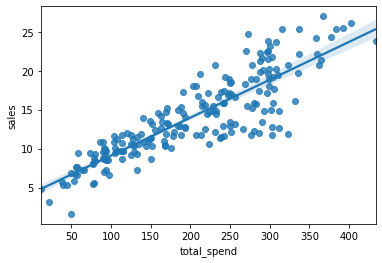

In [7]:
#visualize regression line using OLS
sns.regplot(data=df, x='total_spend', y='sales')

In [9]:
#manually compute OLS
#feature
X = df['total_spend']
#label/target output
y = df['sales']

In [17]:
# y = mx + b
# y = B1x + B0
beta = np.polyfit(X, y, deg=1)

In [15]:
potential_spend = np.linspace(0,500,100)

In [19]:
beta[0]

0.04868787931904818

In [20]:
predicted_sales = (beta[0]*potential_spend)+beta[1]

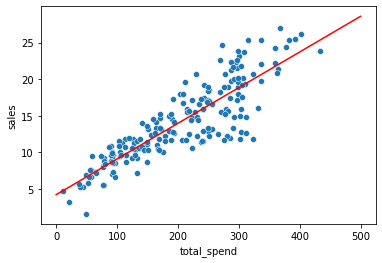

In [22]:
sns.scatterplot(x='total_spend', y='sales', data=df)
plt.plot(potential_spend,predicted_sales, color='red')

In [24]:
expected_spend = 200
predicted_sales1 = (beta[0]*expected_spend)+beta[1]
predicted_sales1

13.98060407984596

In [27]:
##polyfit for the following equation
beta1 = np.polyfit(X,y,deg=3)

# y = B3x**3 + B2*x**2 + B1x + B0

In [28]:
pot_spend = np.linspace(0,500,100)
pred_sales = (beta1[0]*pot_spend**3)+(beta1[1]*pot_spend**2)+(beta1[2]*pot_spend)+beta1[3]

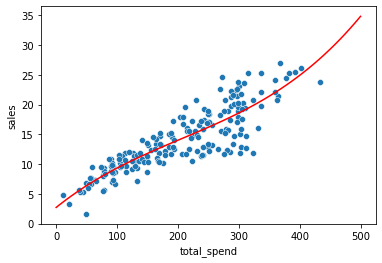

In [29]:
sns.scatterplot(x='total_spend', y='sales', data=df)
plt.plot(pot_spend, pred_sales, color='red')

### What is the relationship between each advertising channel and sales?

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
df = pd.read_csv(r'sample_files/Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


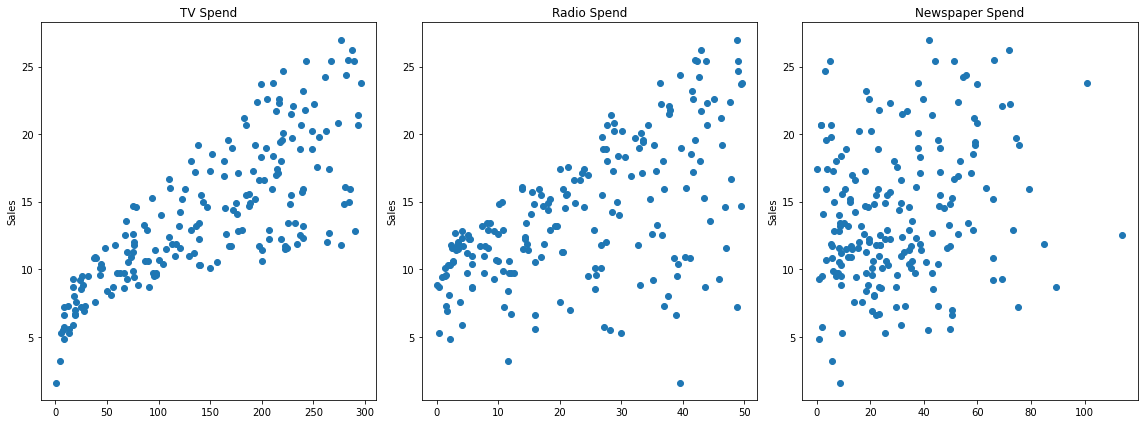

In [33]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel('Sales')
axes[0].set_title('TV Spend')

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title('Radio Spend')
axes[1].set_ylabel('Sales')

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title('Newspaper Spend')
axes[2].set_ylabel('Sales')
plt.tight_layout()

In [35]:
#define features
X = df.drop('sales',axis=1)
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [37]:
#define label
y = df['sales']
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [40]:
# TRAIN, TEST SPLIT
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

In [44]:
#create model
from sklearn.linear_model import LinearRegression

#explore hyperparameters
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtr

In [45]:
model = LinearRegression()

In [46]:
model.fit(X_train,y_train)

LinearRegression()

In [47]:
model.predict(X_test)

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [ ]:
### PERFORMANCE EVALUATION